In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nutritional_value = pd.read_csv('menu.csv')

In [3]:
nutritional_values = nutritional_value.copy()
nutritional_values.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [4]:
nutritional_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [24]:
def is_less_than(num, adequate):
    if num < adequate:
        return True
    else:
        return False

In [25]:
nutritional_values['Sodium<<800']= nutritional_values[['Sodium']].apply(is_less_than(nutritional_values['Sodium'],800))
nutritional_values[['Sodium<<800']].head(30)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [19]:
is_less_than(nutritional_values['Sodium'], 800)

True

In [4]:
def sodium_content(num):
    if num < 800:
        return True
    else:
        return False

In [5]:
# cholesterol per day is 300mm i.e 100 per meal
def cholesterol(num):
    if num < 100:
        return True
    else:
        return False

In [6]:
# sugar per day is 36g i.e 12g per meal
def sugar(num):
    if num < 12:
        return True
    else:
        return False

In [7]:
# calories per day is 2500, i.e 850 per meal
def calories(num):
    if num < 850:
        return True
    else:
        return False

In [8]:
nut1['sodium<800'] = nut1['Sodium'].apply(sodium_content)
nut1['sugar<12'] = nut1['Sugars'].apply(sugar)
nut1['Calories<850'] = nut1['Calories'].apply(calories)
nut1['cholesterol<100'] = nut1['Cholesterol'].apply(cholesterol)

In [1]:
#looking at the data, specifically at the categories column, we can further classify the items into liquid items and solid items 
#so i split the original dataframe into those two categories
#first looking at the data, there are nine categories


In [10]:
nutg = nut1.groupby('Category')

In [48]:
nutg.describe()

Calories                                               \
                      count        mean         std    min    25%    50%   
Category                                                                   
Beef & Pork            15.0  494.000000  141.360734  240.0  430.0  500.0   
Beverages              27.0  113.703704   99.194764    0.0    0.0  100.0   
Breakfast              42.0  526.666667  221.675072  150.0  410.0  470.0   
Chicken & Fish         27.0  552.962963  306.541688  190.0  410.0  480.0   
Coffee & Tea           95.0  283.894737  157.812808    0.0  180.0  270.0   
Desserts                7.0  222.142857  108.083962   45.0  155.0  250.0   
Salads                  6.0  270.000000  127.436259  140.0  160.0  255.0   
Smoothies & Shakes     28.0  531.428571  230.871365  210.0  337.5  540.0   
Snacks & Sides         13.0  245.769231  141.772208   15.0  150.0  260.0   

                                  Calories from Fat              ...  \
                      75%     max             count        mean  ...   
Category                                                         ...   
Beef & Pork         570.0   750.0              15.0  224.666667  ...   
Beverages           190.0   280.0              27.0    0.740741  ...   
Breakfast           570.0  1150.0              42.0  248.928571  ...   
Chicken & Fish      610.0  1880.0              27.0  242.222222  ...   
Coffee & Tea        370.0   760.0              95.0   71.105263  ...   
Desserts            305.0   340.0               7.0   64.285714  ...   
Salads              357.5   450.0               6.0  108.333333  ...   
Smoothies & Shakes  692.5   930.0              28.0  127.678571  ...   
Snacks & Sides      340.0   510.0              13.0   94.615385  ...   

                   Calcium (% Daily Value)       Iron (% Daily Value)  \
                                       75%   max                count   
Category                                                                
Beef & Pork                          27.50  30.0                 15.0   
Beverages                             0.00  30.0                 27.0   
Breakfast                            23.75  30.0                 42.0   
Chicken & Fish                       20.00  30.0                 27.0   
Coffee & Tea                         40.00  60.0                 95.0   
Desserts                             22.50  25.0                  7.0   
Salads                               15.00  15.0                  6.0   
Smoothies & Shakes                   50.00  70.0                 28.0   
Snacks & Sides                       10.00  10.0                 13.0   

                                                                        
                         mean       std   min   25%   50%    75%   max  
Category                                                                
Beef & Pork         23.333333  5.875697  15.0  20.0  20.0  27.50  35.0  
Beverages            0.296296  1.539601   0.0   0.0   0.0   0.00   8.0  
Breakfast           17.142857  7.925173   2.0  15.0  15.0  20.00  40.0  
Chicken & Fish      16.370370  5.616926   2.0  15.0  20.0  20.00  25.0  
Coffee & Tea         2.147368  2.547291   0.0   0.0   2.0   4.00   8.0  
Desserts             4.000000  3.829708   0.0   0.0   6.0   7.00   8.0  
Salads              10.333333  3.829708   6.0   8.0   9.0  13.75  15.0  
Smoothies & Shakes   3.964286  4.041288   0.0   0.0   2.0   6.50  15.0  
Snacks & Sides       6.615385  3.686427   0.0   4.0   8.0  10.00  10.0  

[9 rows x 168 columns]

In [12]:
nut1.tail(10)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),sodium<800,sugar<12,Calories<850,cholesterol<100
250,Smoothies & Shakes,Shamrock Shake (Medium),16 fl oz cup,660,170,19.0,29,12.0,61,1.0,...,93,14,25,0,50,0,True,False,True,True
251,Smoothies & Shakes,Shamrock Shake (Large),22 fl oz cup,820,210,23.0,35,15.0,73,1.0,...,115,18,30,0,60,0,True,False,True,True
252,Smoothies & Shakes,McFlurry with M&M’s Candies (Small),10.9 oz (310 g),650,210,23.0,35,14.0,72,0.5,...,89,13,15,0,45,8,True,False,True,True
253,Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),16.2 oz (460 g),930,290,33.0,50,20.0,102,1.0,...,128,20,25,0,70,10,True,False,False,True
254,Smoothies & Shakes,McFlurry with M&M’s Candies (Snack),7.3 oz (207 g),430,140,15.0,24,10.0,48,0.0,...,59,9,10,0,30,4,True,False,True,True
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,64,12,15,0,40,8,True,False,True,True
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,85,15,20,0,50,10,True,False,True,True
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,43,8,10,0,25,6,True,False,True,True
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,103,21,20,0,60,6,True,False,True,True
259,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Snack),7.1 oz (202 g),410,150,16.0,25,8.0,38,0.0,...,51,10,10,0,30,4,True,False,True,True


In [13]:
def integer (n):
    if n[-3]=='(':
        return int(n[-2:])
    else:
        return int(n)

In [14]:
solid = nut1[(nut1['Category'] == 'Beef & Pork') |(nut1['Category'] == 'Breakfast') |
                   (nut1['Category'] == 'Chicken & Fish')|(nut1['Category'] == 'Desserts' )|
                   (nut1['Category'] == 'Salads' )|(nut1['Category'] == 'Snacks & Sides') ]

In [15]:
solid_items = solid.copy()

In [16]:
liquid_items = nut1[(nut1['Category'] != 'Beef & Pork') &(nut1['Category'] != 'Breakfast') &
                   (nut1['Category'] != 'Chicken & Fish')&(nut1['Category'] != 'Desserts' )&
                   (nut1['Category'] != 'Salads' )&(nut1['Category'] != 'Snacks & Sides') ]

In [17]:
liquid_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 110 to 259
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       150 non-null    object 
 1   Item                           150 non-null    object 
 2   Serving Size                   150 non-null    object 
 3   Calories                       150 non-null    int64  
 4   Calories from Fat              150 non-null    int64  
 5   Total Fat                      150 non-null    float64
 6   Total Fat (% Daily Value)      150 non-null    int64  
 7   Saturated Fat                  150 non-null    float64
 8   Saturated Fat (% Daily Value)  150 non-null    int64  
 9   Trans Fat                      150 non-null    float64
 10  Cholesterol                    150 non-null    int64  
 11  Cholesterol (% Daily Value)    150 non-null    int64  
 12  Sodium                         150 non-null    i

In [18]:
a = pd.Series(n[-6:-3] for n in solid_items['Serving Size'])
solid_items['Serving Size(g)'] = a.apply(integer)

In [19]:
solid_items

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),sodium<800,sugar<12,Calories<850,cholesterol<100,Serving Size(g)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,17,10,0,25,15,True,True,True,False,136
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,18,6,0,25,8,True,True,True,True,135
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,14,8,0,25,10,True,True,True,True,111
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,21,15,0,30,15,False,True,True,False,161
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,21,6,0,25,10,False,True,True,True,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Desserts,Oatmeal Raisin Cookie,1 cookie (33 g),150,50,6.0,9,2.5,13,0.0,...,2,2,0,2,6,True,False,True,True,33
106,Desserts,Kids Ice Cream Cone,1 oz (29 g),45,10,1.5,2,1.0,4,0.0,...,1,2,0,4,0,True,True,True,True,29
107,Desserts,Hot Fudge Sundae,6.3 oz (179 g),330,80,9.0,14,7.0,34,0.0,...,8,8,0,25,8,True,False,True,True,179
108,Desserts,Hot Caramel Sundae,6.4 oz (182 g),340,70,8.0,12,5.0,24,0.0,...,7,10,0,25,0,True,False,True,True,182


<AxesSubplot:xlabel='Sodium', ylabel='Count'>

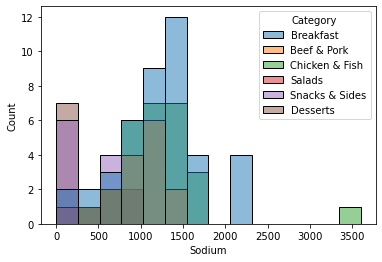

In [20]:
sns.histplot(x = 'Sodium', data = solid_items, hue = 'Category')

<AxesSubplot:xlabel='Sodium', ylabel='Count'>

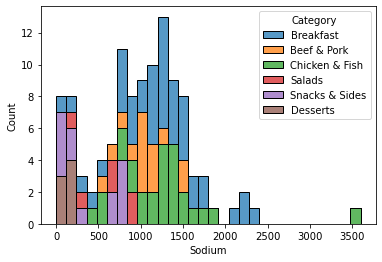

In [21]:
sns.histplot(x = 'Sodium', data = solid_items, bins = 30, hue = 'Category', multiple = 'stack')

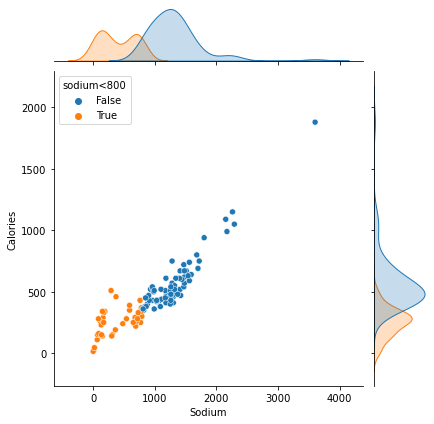

In [22]:
sns.jointplot(x = 'Sodium', y = 'Calories', data = solid_items, hue = 'sodium<800')

<Figure size 864x576 with 0 Axes>

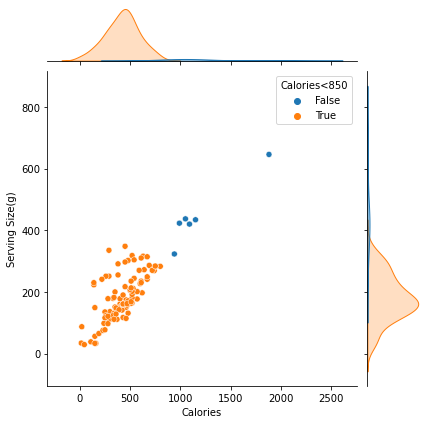

In [23]:
fig = plt.figure(figsize = (12,8))
sns.jointplot(x = 'Calories', y = 'Serving Size(g)', data = solid_items, hue = 'Calories<850')

<AxesSubplot:xlabel='Calories', ylabel='Category'>

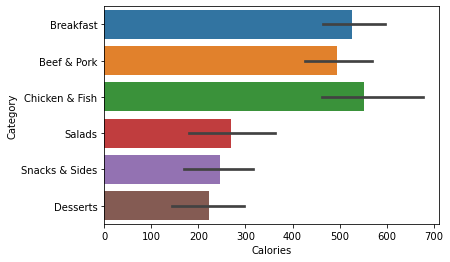

In [24]:
sns.barplot(x = 'Calories', y = 'Category', data = solid_items)

<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

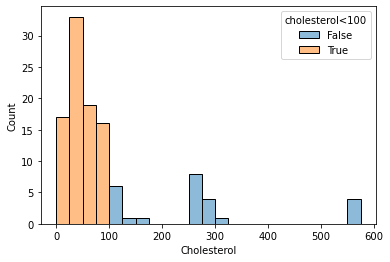

In [25]:
sns.histplot(x = 'Cholesterol', data = solid_items, hue = 'cholesterol<100')

<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

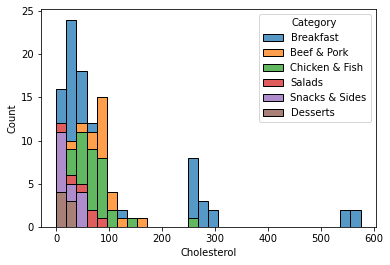

In [26]:
sns.histplot(x = 'Cholesterol', data = solid_items, bins = 30, hue = 'Category', multiple = 'stack')

In [27]:
solid_items['Cholesterol'].describe()

count    110.000000
mean      94.727273
std      119.898344
min        0.000000
25%       30.000000
50%       50.000000
75%       90.000000
max      575.000000
Name: Cholesterol, dtype: float64

In [28]:
solid_items[solid_items['Cholesterol'] == solid_items['Cholesterol'].max()]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),sodium<800,sugar<12,Calories<850,cholesterol<100,Serving Size(g)
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),14.8 oz (420 g),1090,510,56.0,87,19.0,96,0.0,...,36,15,2,25,40,False,False,False,False,420
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),15.3 oz (434 g),1150,540,60.0,93,20.0,100,0.0,...,36,15,2,30,40,False,False,False,False,434


<AxesSubplot:xlabel='Sugars', ylabel='Category'>

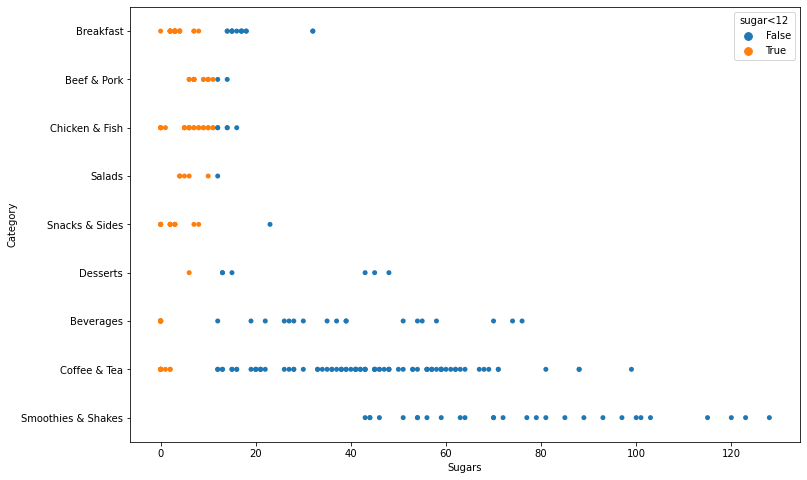

In [52]:
plt.figure(figsize= (12,8))
sns.stripplot(x = 'Sugars', y = 'Category', data = nut1, hue = 'sugar<12', jitter = False)

<AxesSubplot:xlabel='Sugars', ylabel='Category'>

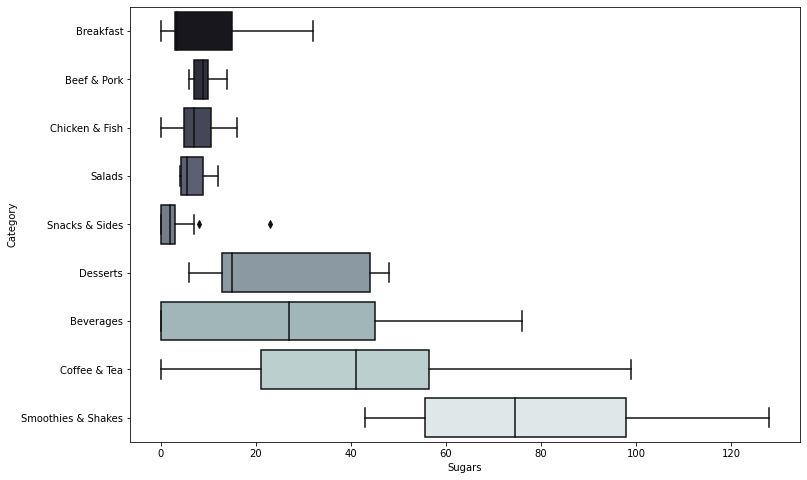

In [46]:
plt.figure(figsize= (12,8))
sns.boxplot(x = 'Sugars', y = 'Category', data = nut1, palette = 'bone')

In [54]:
solid_items[['Calories','Cholesterol', 'Sugars', 'Sodium', 'Serving Size(g)']].corr()

,Calories,Cholesterol,Sugars,Sodium,Serving Size(g)
Calories,1.000000,0.552070,0.033742,0.911584,0.829123
Cholesterol,0.552070,1.000000,-0.075842,0.537456,0.415137
Sugars,0.033742,-0.075842,1.000000,-0.140414,0.177174
Sodium,0.911584,0.537456,-0.140414,1.000000,0.758699
Serving Size(g),0.829123,0.415137,0.177174,0.758699,1.000000


# Conclusion
From the above analysis, it can be seen that most of the items offered, are high in sodium, but contain moderate amount of cholesterol. Although their meals contains below average calories, it requires you to consume twice or more of these meals to reach an adequate amount, meaning individuals who do this, pose the risk of accumulating high cholesterol and saturated fats, with the already high amount of sodium. From this, it can be seen that it is unhealthy to partake in this items often.